# Baseball Data

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

#### Loading Baseball dataset into pandas

In [9]:
df = pd.read_csv('BaseBallPayers.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


Looks like **salary** has some missing values

#### Boxplot of the Salary

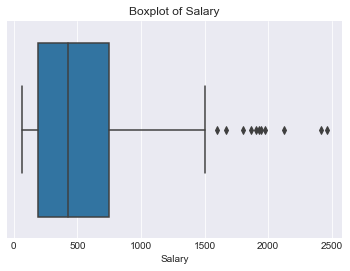

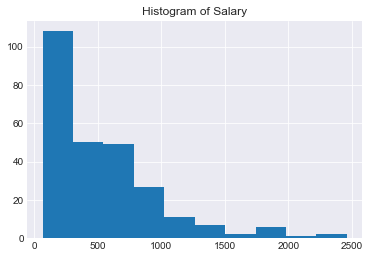

In [11]:
sns.boxplot(df['Salary']);
plt.title('Boxplot of Salary')
plt.show()
df['Salary'].hist();
plt.title('Histogram of Salary');

Data of salary is skewed to the right 

# Using Regression to Impute Null values
## Now for treating Missing values, we first observe the dataset without missing values to see how the salaries are behaving due to other characteristics.
We develop two datasets here, one without missing values and the other with only missing salary values. "df_train1" is our dataset without missing values and "df_na" is our dataset with only missing values.

In [12]:
df_train1 = df.dropna()
df_train1.shape

(263, 20)

In [13]:
df['Salary'].describe()

count     263.000000
mean      535.925882
std       451.118681
min        67.500000
25%       190.000000
50%       425.000000
75%       750.000000
max      2460.000000
Name: Salary, dtype: float64

In [14]:
df_na = df.query('Salary == "NaN"')
df_na.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,NaN,A
22,22,10,1,4,2,1,6,84,26,2,9,9,3,A,W,812,84,11,NaN,A
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,A,W,127,221,7,NaN,A


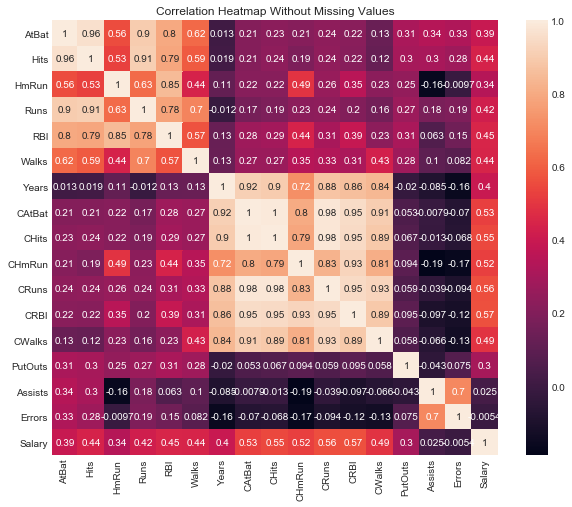

In [15]:
plt.figure(figsize=(10,8));
sns.heatmap(df_train1.corr(), annot = True);
plt.title('Correlation Heatmap Without Missing Values');

## Now we use Linear Regression to predict the missing Salary values of our dataset by using the "df_train" dataset which is without any missing values.
Here we will use variables 'CRuns','CRBI','CWalks','AtBat' to predict the missing salary values in "df_na" because of the high co-relation of above variables with salary in the Heat Map above.

In [16]:
from sklearn.linear_model import LinearRegression
X = df_train1[['CRuns','CRBI','CWalks','AtBat']]
y = df_train1['Salary']
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## After running the regression model on our dataset without missing values, we now predict the missing salary values in our dataset df_na using the same variables that we used for regression on "df_train1".

In [17]:
X_na = df_na[['CRuns','CRBI','CWalks','AtBat']]
df_na['Salary'] = lm.predict(X_na)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### We have now succesfully imputed the missing salary values in "df_na" dataset.

In [18]:
df_na.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,221.953383,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,121.872806,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,733.856237,A
22,22,10,1,4,2,1,6,84,26,2,9,9,3,A,W,812,84,11,-16.944391,A
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,A,W,127,221,7,823.635222,A


In [19]:
df_na['Salary'].describe()

count      59.000000
mean      428.258076
std       327.076778
min       -28.570881
25%       181.218647
50%       345.289696
75%       652.848604
max      1225.425414
Name: Salary, dtype: float64

#### Now we merge the dataset without missing values i.e. "df_train1" and the recently imputed dataset "df_na" and name it "df_main".

In [20]:
df_main = pd.concat([df_train1, df_na])
df_main.shape

(322, 20)

In [21]:
df_main.reset_index(drop = True, inplace = True)
df_main.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


## Exploratory Data Analysis of Dataset

#### Subsetting dataframe based on league
Now we explore whether there is any significant differences in the salaries of players based on the league that they play in. The two leagues here are American league and the National league respectively.

In [22]:
df_a = df.query('League == "A"')
df_n = df.query('League == "N"')
print('Sumary of Salary on American League')
print(df_a['Salary'].describe())
print('Summary of Salary on National League')
df_n['Salary'].describe()

Sumary of Salary on American League
count     139.000000
mean      541.999547
std       464.782755
min        67.500000
25%       187.500000
50%       400.000000
75%       775.833500
max      2460.000000
Name: Salary, dtype: float64
Summary of Salary on National League


count     124.000000
mean      529.117500
std       437.073248
min        70.000000
25%       190.750000
50%       450.000000
75%       740.000000
max      2127.333000
Name: Salary, dtype: float64

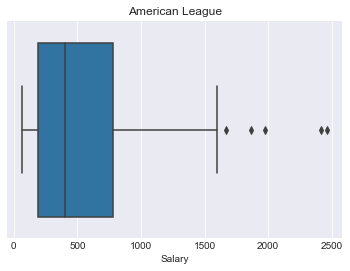

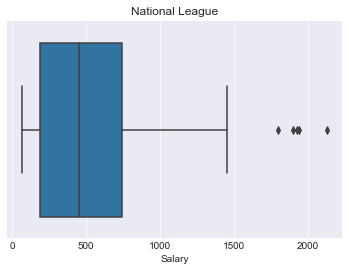

In [23]:
sns.boxplot(df_a['Salary']);
plt.title('American League');
plt.show()
sns.boxplot(df_n['Salary']);
plt.title('National League');

As we can observe from the summary statistics and visualizations above, there is no significant difference in the Salary Cap of players based on their respectively leagues they play in.

#### Histogram of all numerical variables

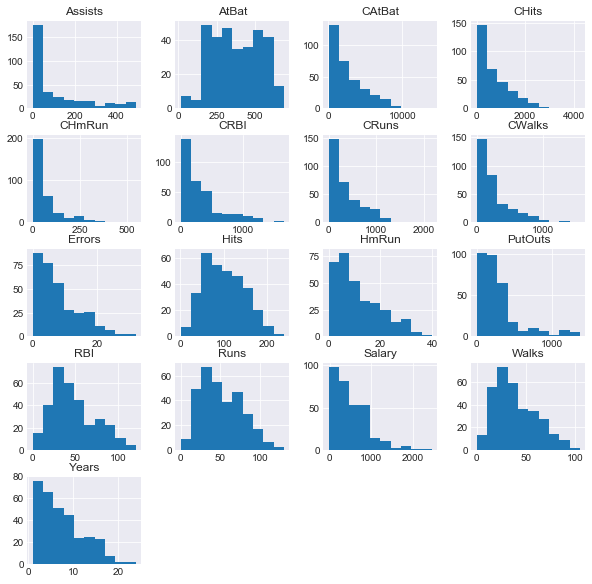

In [24]:
df_main.hist(figsize=(10,10));

Most of the variables in our dataset are skewed to the right.

#### Scatter Matrix Of the DataFrame

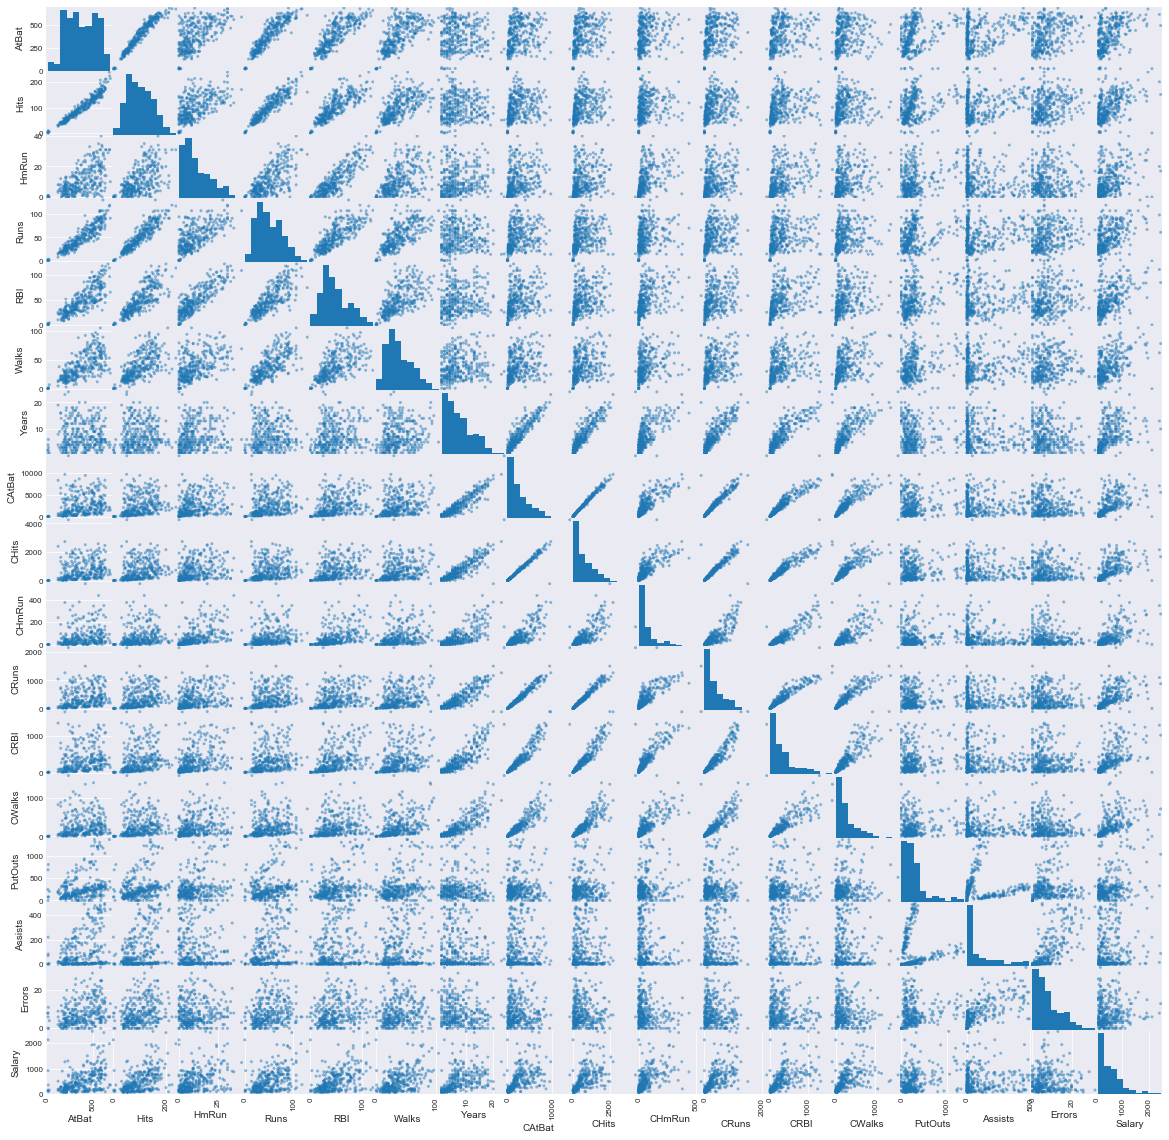

In [455]:
pd.plotting.scatter_matrix(df_main, figsize=[20,20]);

From the **scatter matrix** it is clearly visible which variables are linearly related to the salary column.

## Outlier Treatment
Now we explore the newly imputed dataset and check for any outliers.

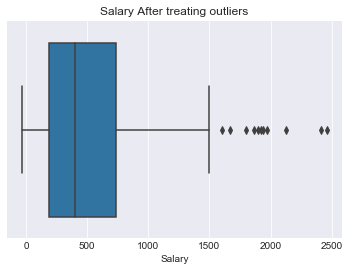

In [25]:
sns.boxplot(df_main['Salary']);
plt.title('Salary After treating outliers');

## Checking Correlation Using Heatmap

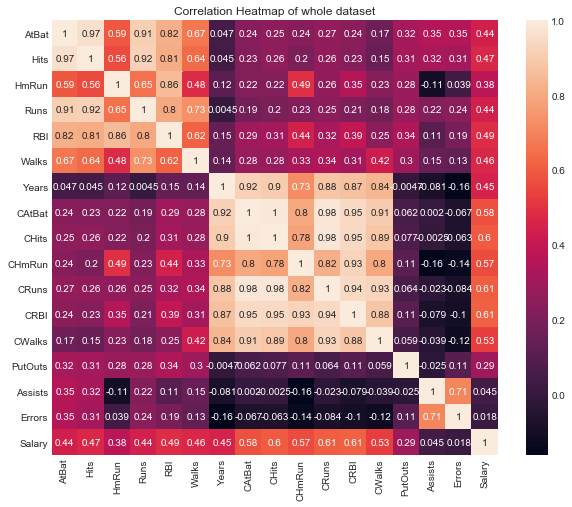

In [26]:
plt.figure(figsize=(10,8));
sns.heatmap(df_main.corr(), annot = True);
plt.title('Correlation Heatmap of whole dataset');

In [27]:
df_main['Salary'].describe()

count     322.000000
mean      516.197930
std       432.634963
min       -28.570881
25%       190.000000
50%       405.061100
75%       740.000000
max      2460.000000
Name: Salary, dtype: float64

Replacing outliers with whisker, this way outliers are still maximum values, but they'll not affect our model performance.

In [28]:
df_main[df_main['CAtBat'] > 8585] = 8585
df_main[df_main['Salary'] > 1590] = 1590

In [29]:
df['Salary'].describe()

count     263.000000
mean      535.925882
std       451.118681
min        67.500000
25%       190.000000
50%       425.000000
75%       750.000000
max      2460.000000
Name: Salary, dtype: float64

In [30]:
df_main['Salary'].describe()

count     322.000000
mean      515.140564
std       406.398336
min       -28.570881
25%       190.000000
50%       412.561100
75%       750.000000
max      1590.000000
Name: Salary, dtype: float64

#### After imputing the missing values and treating the outliers, we now compare the mean and median of Salaries of datasets before and after imputing the data to check whether there is not too much variance in it.
#### Here as we can observe below, there is not much variance in the mean and median of the salaries. Hence, the treatment of the missing values is acceptable for further model development.

## Regression Model
#### Now we apply linear regression to Career-runs, career-rbi, career-walks, AtBat and Total hits in the previous season.
We are choosing these variable as we observe high corelation of them with the Salary, which is evident in the heat map above. We split the "df_main" datasaet with imputed missing values into train and test data with 80:20 ratio.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

linear = LinearRegression(normalize=True)
# X = df_main.drop(['Salary'], axis = 1)
X = df_main[['CRuns', 'CRBI', 'CWalks', 'AtBat', 'Hits']]
# X = pd.get_dummies(X, drop_first=True)

y = df_main['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

#### We obtain R-square value of 70.18 for the train datasets, which is quite appropriate for the performance of the model.

In [49]:
linear.score(X_train, y_train)

0.70182296823413848

#### We obtain R-square value of 76.85 for the test datasets, which implies that there is very difference between train and test datasets. So the overall variance of the data is very explained here.

In [50]:
linear.score(X_test, y_test)

0.76852201707205914

#### Given the unpredictability of the observations, the residual standard error of 205 is acceptable for the model to perform accurately.

In [51]:
from sklearn.metrics import mean_squared_error
pred = linear.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred))

205.34790756249984

#### 5 Fold Cross Validation Score

In [41]:
linear_cv = cross_val_score(lm, X_test, y_test, cv=5)
print('Average CV_Scores 0f Simple Multiple Linear Regression: {}'.format(np.mean(linear_cv)))

Average CV_Scores 0f Simple Multiple Linear Regression: 0.7003794277259245


#### Dataframe of Model coefficients

In [52]:
cols = ['CRuns', 'CRBI', 'CWalks', 'AtBat', 'Hits']
pd.DataFrame(np.transpose(linear.coef_), cols)

,0
CRuns,0.665085
CRBI,0.168684
CWalks,-0.137273
AtBat,0.731219
Hits,-0.422363


$$The\:Notebook\:ends\:here\:Thanks!!$$